<a href="https://colab.research.google.com/github/mahdaalma/ALMA-/blob/main/PERTEMUAN_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
# Package to load
import numpy as np # linear algebra
import pandas as pd # Digunakan untuk manipulasi, analisis, dan pengelolaan data dalam bentuk tabel (dataframe) secara efisien.
import matplotlib.pyplot as plt # igunakan untuk membuat visualisasi data seperti grafik, diagram, dan plot lainnya.
import seaborn as sns


#All necessary plotly libraries
import plotly as plotly
import plotly.io as plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# stats tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import itertools
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import acorr_ljungbox


import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [147]:
#memanggil data harga telur di semarang
rr=pd.read_csv('https://raw.githubusercontent.com/lailynissa/time-series/refs/heads/main/harga%20telur%20semarang.csv')

In [148]:
#menampilkan 10 data pertama
rr.head(10)

,periode,semarang
0,02/01/2023,27900.00000
1,03/01/2023,27900.00000
2,04/01/2023,28000.00000
3,05/01/2023,28000.00000
4,06/01/2023,28000.00000
5,07/01/2023,27966.66667
6,08/01/2023,27933.33333
7,09/01/2023,27900.00000
8,10/01/2023,27800.00000
9,11/01/2023,27700.00000


In [149]:
#memeriksa tipe data
rr.dtypes

,0
periode,object
semarang,float64


In [150]:
# Konversi kolom 'periode' ke format datetime dengan dayfirst=True
rr['periode'] = pd.to_datetime(rr['periode'], dayfirst=True)

# Menampilkan 5 data pertama
print(rr.head(5))

     periode  semarang
0 2023-01-02   27900.0
1 2023-01-03   27900.0
2 2023-01-04   28000.0
3 2023-01-05   28000.0
4 2023-01-06   28000.0


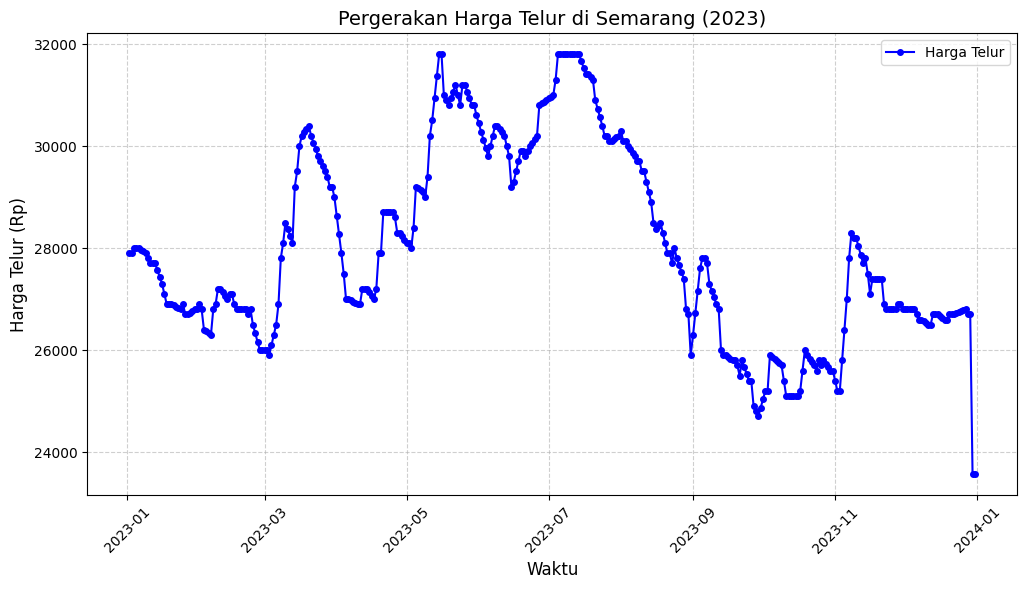

In [151]:
# Plot data dengan perbaikan tampilan
plt.figure(figsize=(12, 6))
plt.plot(rr['periode'], rr['semarang'], '-o', color='blue', markersize=4, label="Harga Telur")  # Warna lebih soft

# Atur label
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Harga Telur (Rp)', fontsize=12)
plt.title('Pergerakan Harga Telur di Semarang (2023)', fontsize=14)

# Atur sumbu X agar lebih rapi
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.6)  # Grid lebih halus
plt.legend()
plt.show()

In [152]:
# Statistik deskriptif
print("\nStatistik deskriptif:")
print(rr.describe())


Statistik deskriptif:
                   periode      semarang
count                  364    364.000000
mean   2023-07-02 12:00:00  27998.644626
min    2023-01-02 00:00:00  23572.071940
25%    2023-04-02 18:00:00  26700.000000
50%    2023-07-02 12:00:00  27550.000000
75%    2023-10-01 06:00:00  29800.000000
max    2023-12-31 00:00:00  31800.000000
std                    NaN   1909.367633


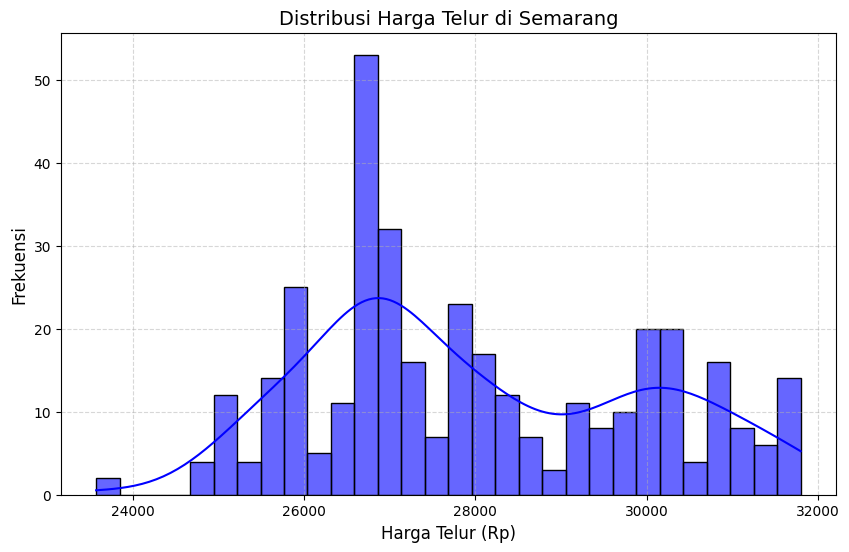

In [153]:
# Pastikan harga telur tidak mengandung nilai negatif
data_positif = rr[rr['semarang'] > 0]

# Membuat figure
plt.figure(figsize=(10, 6))

# Histogram dengan KDE untuk distribusi harga telur
sns.histplot(data_positif['semarang'], bins=30, kde=True, color='blue', edgecolor='black', alpha=0.6)

# Atur label dan judul
plt.xlabel('Harga Telur (Rp)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.title('Distribusi Harga Telur di Semarang', fontsize=14)

# Tampilkan grid
plt.grid(linestyle="--", alpha=0.5)

# Tampilkan plot
plt.show()

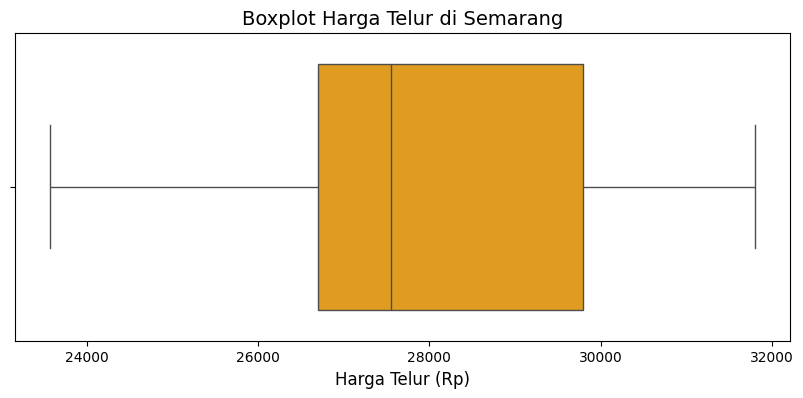

In [154]:
# Membuat Boxplot untuk distribusi harga telur
plt.figure(figsize=(10, 4))
sns.boxplot(x=data_positif['semarang'], color='orange')

# Atur label dan judul
plt.xlabel('Harga Telur (Rp)', fontsize=12)
plt.title('Boxplot Harga Telur di Semarang', fontsize=14)

# Tampilkan plot
plt.show()

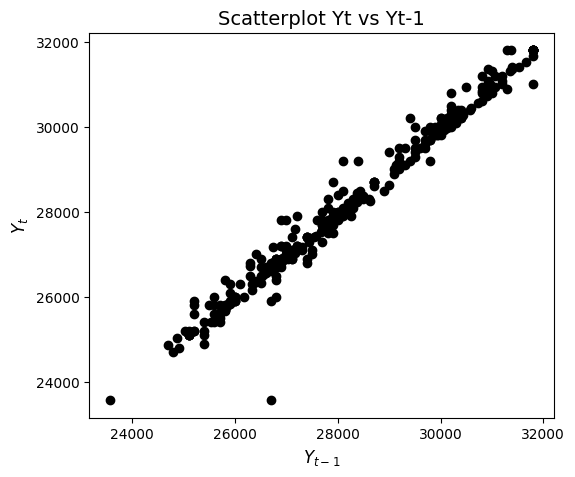

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

# Scatter plot Yt vs Yt-1 (Lag=1)
plt.figure(figsize=(6, 5))
pd.plotting.lag_plot(data_positif['semarang'], lag=1, c='black')  # Gunakan 'c=' bukan 'color='

# Atur label
plt.xlabel(r'$Y_{t-1}$', fontsize=12)
plt.ylabel(r'$Y_t$', fontsize=12)
plt.title('Scatterplot Yt vs Yt-1', fontsize=14)

# Tampilkan plot
plt.show()

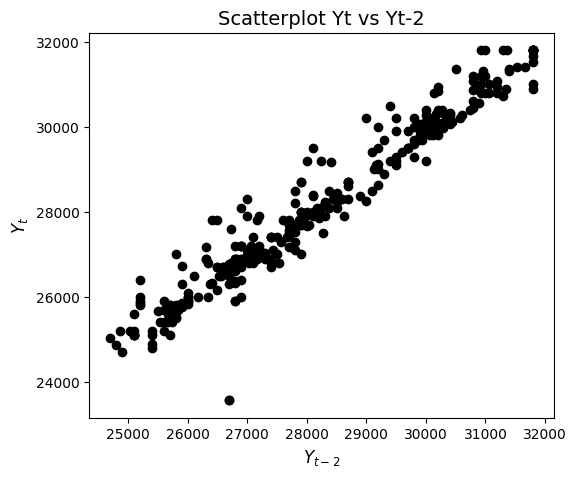

In [206]:
# Scatter plot Yt vs Yt-2 (Lag=2)
plt.figure(figsize=(6, 5))
pd.plotting.lag_plot(data_positif['semarang'], lag=2, c='black')  # Gunakan 'c=' bukan 'color='

# Atur label
plt.xlabel(r'$Y_{t-2}$', fontsize=12)
plt.ylabel(r'$Y_t$', fontsize=12)
plt.title('Scatterplot Yt vs Yt-2', fontsize=14)

# Tampilkan plot
plt.show()

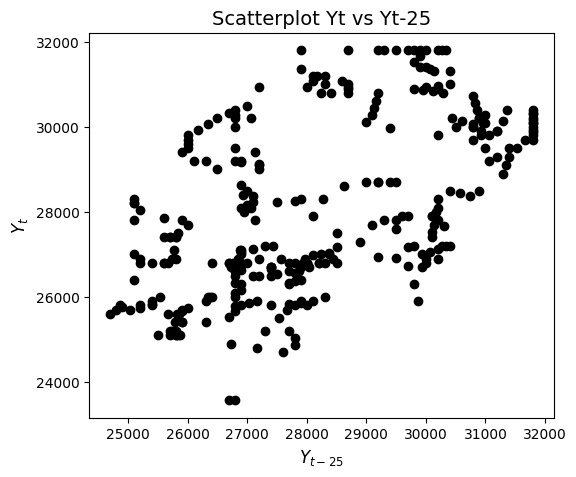

In [212]:
# Scatter plot Yt vs Yt-30 (Lag=25)
plt.figure(figsize=(6, 5))
pd.plotting.lag_plot(data_positif['semarang'], lag=25, c='black')  # Gunakan 'c=' bukan 'color='

# Atur label
plt.xlabel(r'$Y_{t-25}$', fontsize=12)
plt.ylabel(r'$Y_t$', fontsize=12)
plt.title('Scatterplot Yt vs Yt-25', fontsize=14)

# Tampilkan plot
plt.show()

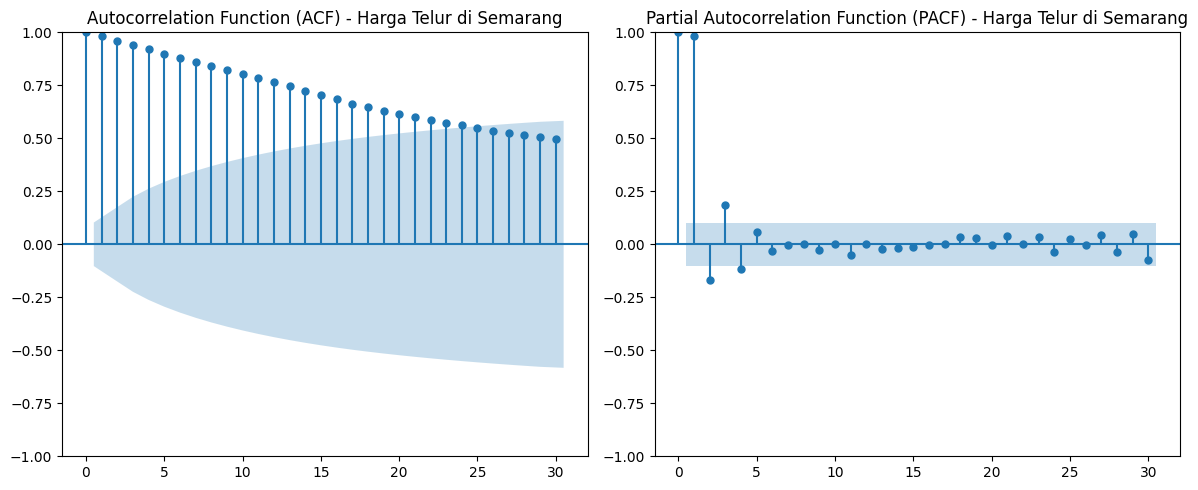

In [158]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Pastikan data tidak memiliki NaN
data_telur = rr['semarang'].dropna()

# Buat figure dengan 2 subplot untuk ACF dan PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ACF
plot_acf(data_telur, ax=axes[0], lags=30)
axes[0].set_title("Autocorrelation Function (ACF) - Harga Telur di Semarang")

# Plot PACF
plot_pacf(data_telur, ax=axes[1], lags=30)
axes[1].set_title("Partial Autocorrelation Function (PACF) - Harga Telur di Semarang")

# Tampilkan plot
plt.tight_layout()
plt.show()

In [159]:
from statsmodels.tsa.stattools import adfuller

# Pastikan data harga telur di Semarang tidak memiliki NaN
data_telur = rr['semarang'].dropna()

# Uji ADF
adf_result = adfuller(data_telur, autolag='AIC')

# Tampilkan p-value dari hasil uji ADF
print(f"P-Value Uji ADF: {adf_result[1]:.5f}")

P-Value Uji ADF: 0.56963


In [160]:
from scipy.stats import boxcox
import numpy as np

# Pastikan data harga telur di Semarang tidak memiliki NaN atau nilai negatif
data_telur = rr['semarang'].dropna()

# Box-Cox hanya bisa untuk data positif, cek jika ada nilai ≤ 0
if (data_telur <= 0).any():
    print("Data mengandung nilai nol atau negatif, tidak dapat menerapkan Box-Cox.")
else:
    # Transformasi Box-Cox dengan interval kepercayaan 95%
    data_transformed, lambda_fit, ci = boxcox(data_telur, alpha=0.05)

    # Menampilkan hasil
    print(f"Nilai lambda: {lambda_fit:.5f}")
    print(f"Interval kepercayaan lambda: {ci}")

Nilai lambda: -1.89873
Interval kepercayaan lambda: (-3.4270430959087284, -0.35213718285702117)


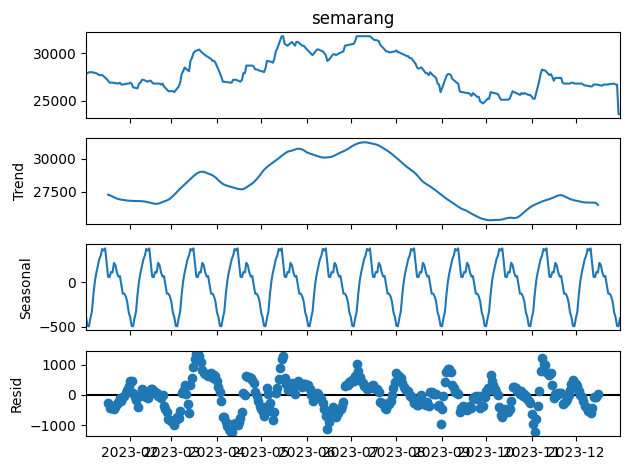

In [143]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan data memiliki indeks waktu yang benar
rr['periode'] = pd.to_datetime(rr['periode'])  # Konversi ke datetime jika belum
rr.set_index('periode', inplace=True)

# Pastikan data memiliki frekuensi bulanan (M) atau harian (D) jika diperlukan
rr = rr.asfreq('D')  # Sesuaikan dengan data asli, bisa 'M' untuk bulanan

# Lakukan dekomposisi musiman
result = seasonal_decompose(rr['semarang'], model='additive', period=30)  # Sesuaikan periodenya

# Plot hasil dekomposisi
result.plot()
plt.show()

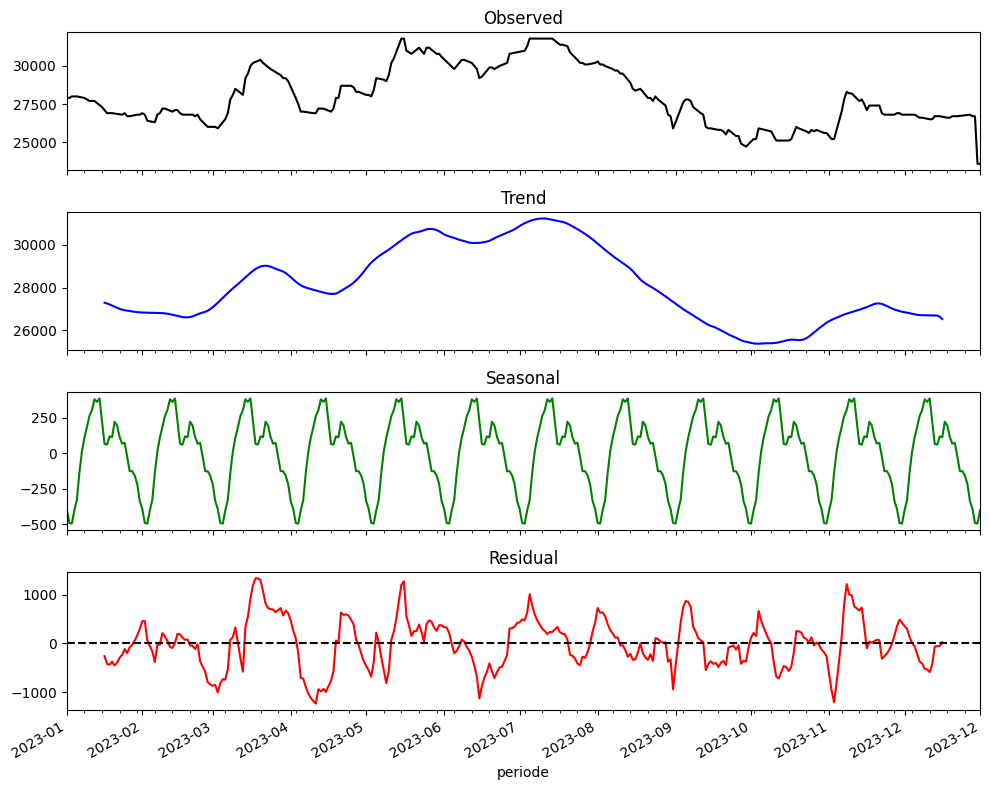

In [161]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Konversi ke datetime dan set sebagai index
rr['periode'] = pd.to_datetime(rr['periode'])
rr.set_index('periode', inplace=True)

# Lakukan dekomposisi musiman
result = seasonal_decompose(rr['semarang'], model='additive', period=30)

# Plot hasil dekomposisi
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Plot tiap komponen
result.observed.plot(ax=axes[0], title="Observed", color="black")
result.trend.plot(ax=axes[1], title="Trend", color="blue")
result.seasonal.plot(ax=axes[2], title="Seasonal", color="green")
result.resid.plot(ax=axes[3], title="Residual", color="red")

# Tambahkan garis nol pada residual
axes[3].axhline(y=0, color='black', linestyle='--')

# Format tanggal agar lebih rapi
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format Tahun-Bulan
plt.xticks(rotation=45)  # Miringkan label tanggal
plt.gcf().autofmt_xdate()  # Atur agar label tidak bertumpuk

plt.tight_layout()
plt.show()

TRANSFORMASI BOX-COX

Nilai lambda Box-Cox: -1.8987269448542867


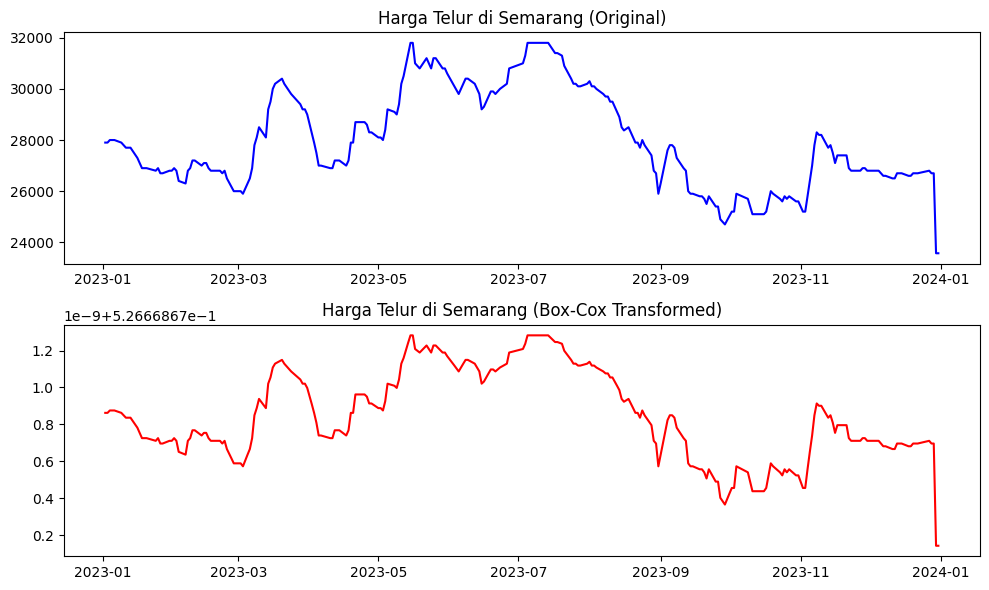

In [162]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Pastikan data tidak ada nilai nol atau negatif
if (rr['semarang'] <= 0).any():
    rr['semarang'] = rr['semarang'] + abs(rr['semarang'].min()) + 1  # Shift agar semua nilai positif

# Transformasi Box-Cox
rr['semarang_boxcox'], lambda_value = boxcox(rr['semarang'])

# Cetak nilai lambda
print(f"Nilai lambda Box-Cox: {lambda_value}")

# Plot sebelum & sesudah transformasi
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# Plot data asli
axes[0].plot(rr.index, rr['semarang'], color='blue')
axes[0].set_title("Harga Telur di Semarang (Original)")

# Plot data setelah Box-Cox
axes[1].plot(rr.index, rr['semarang_boxcox'], color='red')
axes[1].set_title("Harga Telur di Semarang (Box-Cox Transformed)")

plt.tight_layout()
plt.show()

In [163]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(rr['semarang_boxcox'])
print(f'P-value ADF Test: {adf_test[1]}')

P-value ADF Test: 0.6328913781399391


TAHAP DIFFERENCING


In [164]:
rr['semarang_diff'] = rr['semarang'].diff().dropna()

In [165]:
from statsmodels.tsa.stattools import adfuller

adf_test_diff = adfuller(rr['semarang_diff'].dropna())
print(f'P-value ADF Test setelah first differencing: {adf_test_diff[1]}')

P-value ADF Test setelah first differencing: 2.116188032660424e-13


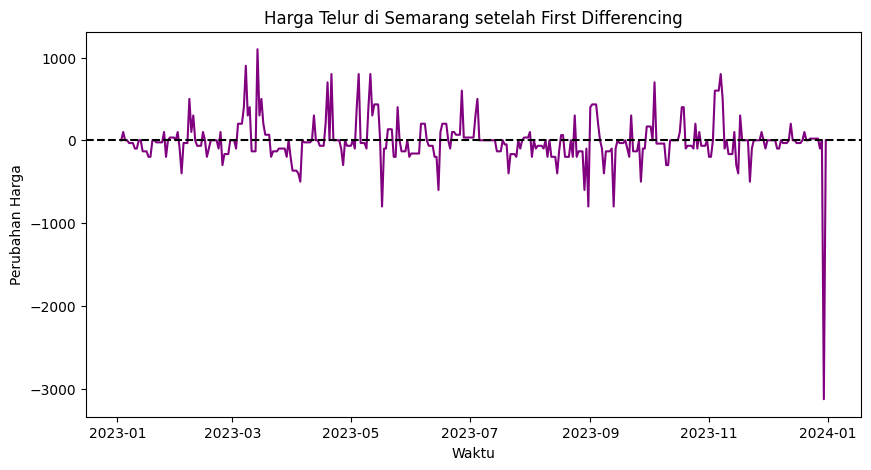

In [166]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(rr['semarang_diff'], color='purple')
plt.title('Harga Telur di Semarang setelah First Differencing')
plt.xlabel('Waktu')
plt.ylabel('Perubahan Harga')
plt.axhline(y=0, color='black', linestyle='--')  # Garis nol
plt.show()

Nilai lambda Box-Cox: 1.8534996101361259


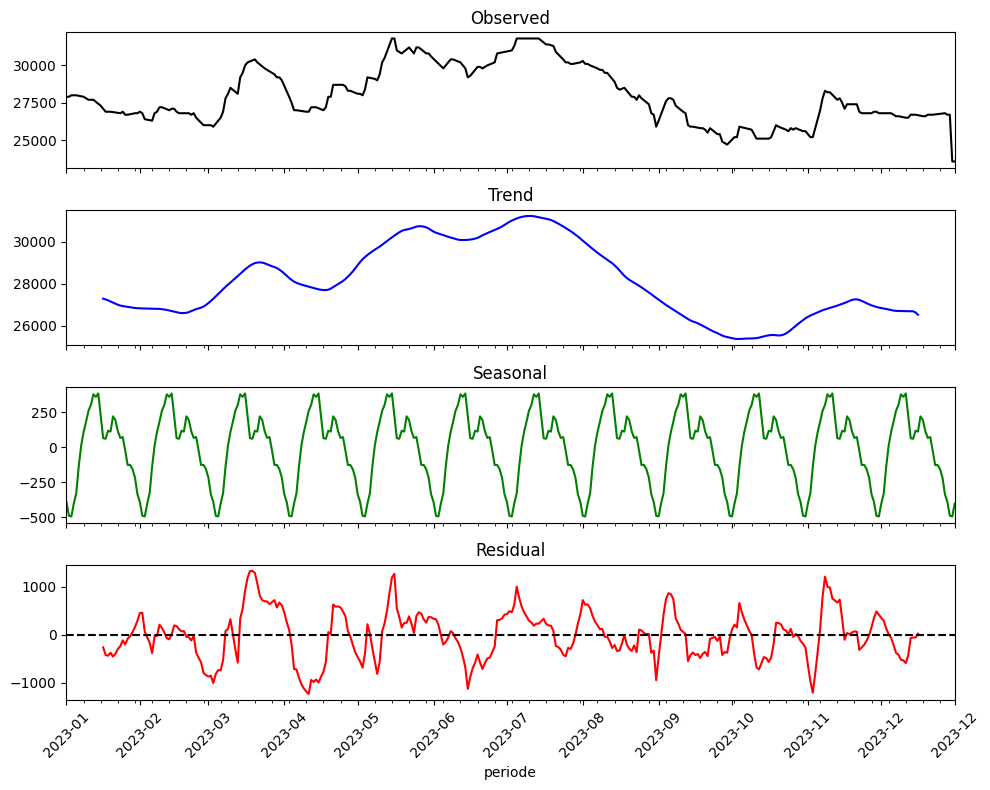

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox

# Reset the index to make 'periode' a column again if it was previously set as index
rr = rr.reset_index()

# Konversi kolom 'periode' menjadi datetime dan jadikan sebagai indeks
rr['periode'] = pd.to_datetime(rr['periode'])
rr.set_index('periode', inplace=True)

# Pastikan kolom 'semarang' ada dalam dataset
if 'semarang' not in rr.columns:
    print("Error: Kolom 'semarang' tidak ditemukan dalam dataset.")
else:
    # **1. Differencing untuk Stasioneritas Mean**
    rr['semarang_diff'] = rr['semarang'].diff() # Remove dropna() here to keep the same index length

    # **2. Transformasi Box-Cox untuk Stasioneritas Varians**
    # Fill NaN with a suitable value, e.g., the mean, before Box-Cox transformation
    rr['semarang_diff'] = rr['semarang_diff'].fillna(rr['semarang_diff'].mean())
    rr['semarang_boxcox'], lambda_boxcox = boxcox(rr['semarang_diff'] + abs(rr['semarang_diff'].min()) + 1)
    print(f"Nilai lambda Box-Cox: {lambda_boxcox}")

    # **3. Dekomposisi Musiman**
    result = seasonal_decompose(rr['semarang'], model='additive', period=30)

    # **4. Plot Hasil Dekomposisi**
    fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    result.observed.plot(ax=axes[0], title="Observed", color="black")
    result.trend.plot(ax=axes[1], title="Trend", color="blue")
    result.seasonal.plot(ax=axes[2], title="Seasonal", color="green")
    result.resid.plot(ax=axes[3], title="Residual", color="red")

    # Tambahkan garis horizontal pada nol untuk residual
    axes[3].axhline(y=0, linestyle="dashed", color="black")

    # Format tanggal agar lebih rapi
    axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [173]:
from statsmodels.tsa.stattools import adfuller

# Use the correct column name 'semarang_boxcox' for transformed data
adf_test = adfuller(rr['semarang_boxcox'])  # Data after differencing and Box-Cox
print(f'P-value ADF Test: {adf_test[1]}')

P-value ADF Test: 2.0912583755394492e-14


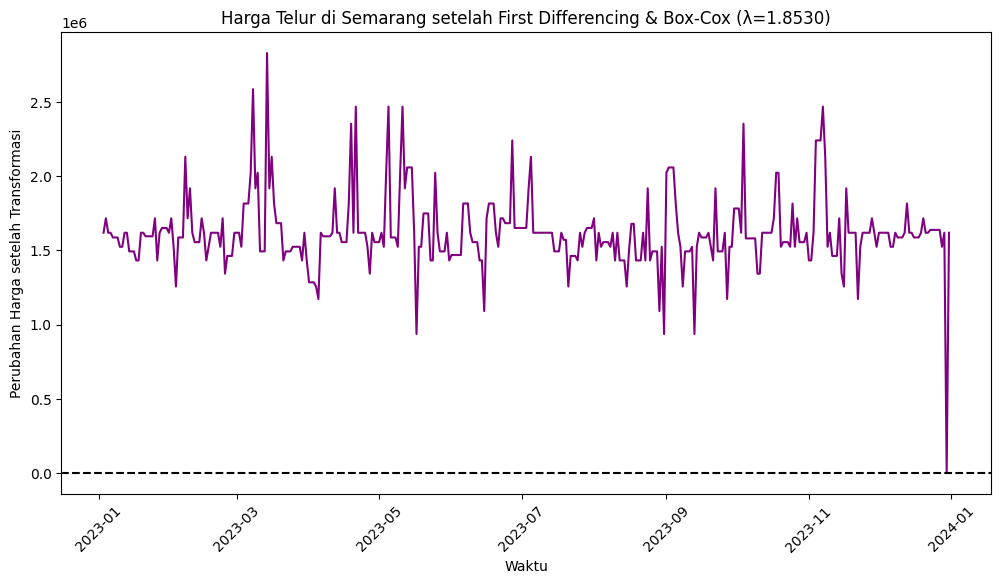

In [178]:
# Pastikan indeks berupa datetime
rr.index = pd.to_datetime(rr.index)

# First Differencing
diff_data = rr['semarang'].diff().dropna()

# Box-Cox Transformation (menambahkan konstanta jika ada nilai negatif)
diff_data_adj = diff_data + abs(diff_data.min()) + 1  # Agar semua nilai positif
boxcox_data, lambda_bc = boxcox(diff_data_adj)

# Plot hasil First Differencing dan Box-Cox dengan waktu sebagai indeks
plt.figure(figsize=(12, 6))
plt.plot(diff_data_adj.index, boxcox_data, color='purple')
plt.axhline(y=0, linestyle='dashed', color='black')
plt.title(f"Harga Telur di Semarang setelah First Differencing & Box-Cox (λ={lambda_bc:.4f})")
plt.xlabel("Waktu")
plt.ylabel("Perubahan Harga setelah Transformasi")
plt.xticks(rotation=45)  # Rotasi label sumbu x agar terbaca
plt.show()

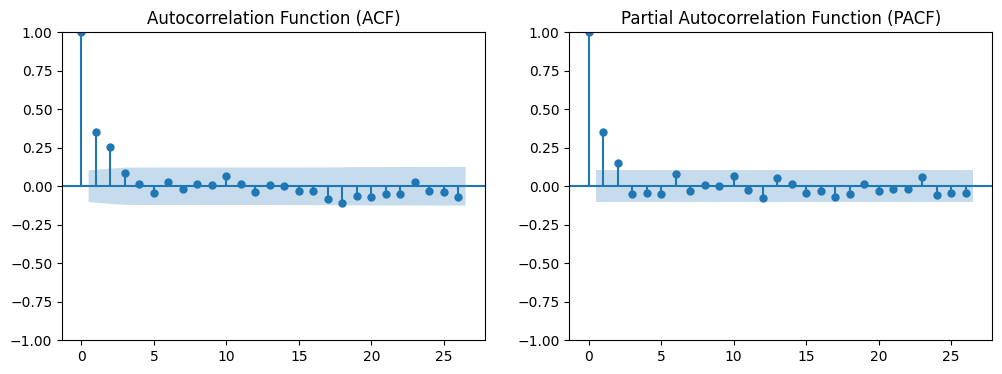

In [175]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ACF untuk menentukan q
# Ganti 'harga_telur_transformed' dengan 'semarang_boxcox'
plot_acf(rr['semarang_boxcox'], ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF untuk menentukan p
# Ganti 'harga_telur_transformed' dengan 'semarang_boxcox'
plot_pacf(rr['semarang_boxcox'], ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

Dari plot ACF dan PACF, kita bisa mengidentifikasi beberapa kemungkinan model ARIMA berdasarkan aturan berikut:
	•	ACF cut-off setelah lag 2 → kemungkinan model MA(q) dengan q = 2.
	•	PACF cut-off setelah lag 2 → kemungkinan model AR(p) dengan p = 2.
	•	First Differencing dilakukan (d = 1) untuk mencapai stasioneritas.

Kemungkinan Model ARIMA yang Bisa Dicoba:
	1. ARIMA(2,1,0) → Model Autoregressive (AR)
	2. ARIMA(0,1,2) → Model Moving Average (MA)
	3. ARIMA(2,1,2) → Model kombinasi ARMA
	4. ARIMA(1,1,2) → Model dengan sedikit lebih sederhana pada AR
	5. ARIMA(2,1,1) → Model dengan sedikit lebih sederhana pada MA
	6. ARIMA(1,1,1) → Model minimalis

In [192]:
import itertools
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Definisikan rentang p, d, q
p = range(0, 3)  # Coba 0 sampai 3
d = range(1, 2)  # Coba 1 (karena sudah diferensiasi)
q = range(0, 3)  # Coba 0 sampai 3

# Buat kombinasi grid search
pdq = list(itertools.product(p, d, q))

# Simpan hasil AIC
best_aic = float("inf")
best_pdq = None
results = []

# Looping mencari kombinasi terbaik
for param in pdq:
    try:
        model = ARIMA(rr['semarang_diff'].dropna(), order=param)  # <- GANTI DI SINI
        model_fit = model.fit()
        aic = model_fit.aic
        results.append((param, aic))

        if aic < best_aic:
            best_aic = aic
            best_pdq = param
    except Exception as e:
        print(f"Model {param} gagal dengan error: {e}")

# Konversi ke DataFrame
results_df = pd.DataFrame(results, columns=["(p,d,q)", "AIC"]).sort_values(by="AIC")

# Menampilkan hasil terbaik
print(f"Best ARIMA Order: {best_pdq} with AIC: {best_aic}")
print(results_df.head())  # Menampilkan 5 kombinasi terbaik

Best ARIMA Order: (2, 1, 1) with AIC: 5109.057589837323
     (p,d,q)          AIC
7  (2, 1, 1)  5109.057590
8  (2, 1, 2)  5110.430292
5  (1, 1, 2)  5113.625426
4  (1, 1, 1)  5117.706641
2  (0, 1, 2)  5124.122388


In [189]:

print(rr.columns)

Index(['semarang', 'semarang_boxcox', 'semarang_diff'], dtype='object')


In [196]:
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Pastikan data sudah dalam bentuk time series

In [197]:
# Tentukan kemungkinan nilai p, d, q berdasarkan ACF dan PACF
p = [1, 2]   # AR terms
d = [1]      # Differencing order (sudah dilakukan differencing 1x)
q = [1, 2]   # MA terms

# Buat kombinasi model ARIMA yang mungkin
model_combinations = list(itertools.product(p, d, q))

In [199]:
best_aic = np.inf  # Inisialisasi nilai AIC terbaik
best_model = None
best_order = None

# Looping mencari kombinasi terbaik
for param in pdq:
    try:
        model = ARIMA(rr['semarang_diff'].dropna(), order=param)  # <- GANTI DI SINI
        model_fit = model.fit()
        aic = model_fit.aic
        results.append((param, aic))

        if aic < best_aic:
            best_aic = aic
            best_pdq = param
    except Exception as e:
        print(f"Model {param} gagal dengan error: {e}")

# Konversi ke DataFrame
results_df = pd.DataFrame(results, columns=["(p,d,q)", "AIC"]).sort_values(by="AIC")

# Menampilkan hasil terbaik
print(f"Best ARIMA Order: {best_pdq} with AIC: {best_aic}")
print(results_df.head())  # Menampilkan 5 kombinasi terbaik

Best ARIMA Order: (2, 1, 1) with AIC: 5109.057589837323
      (p,d,q)          AIC
16  (2, 1, 1)  5109.057590
7   (2, 1, 1)  5109.057590
8   (2, 1, 2)  5110.430292
17  (2, 1, 2)  5110.430292
5   (1, 1, 2)  5113.625426


In [201]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Membuat model ARIMA(1, 1, 1)
model = ARIMA(rr['semarang_diff'].dropna(), order=(2, 1, 1))
model_fit = model.fit()

# Menampilkan ringkasan model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          semarang_diff   No. Observations:                  364
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2550.529
Date:                Sat, 01 Mar 2025   AIC                           5109.058
Time:                        17:00:34   BIC                           5124.635
Sample:                    01-02-2023   HQIC                          5115.250
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2114      0.036      5.795      0.000       0.140       0.283
ar.L2          0.2118      0.062      3.434      0.001       0.091       0.333
ma.L1         -0.9997      0.330     -3.034      0.0

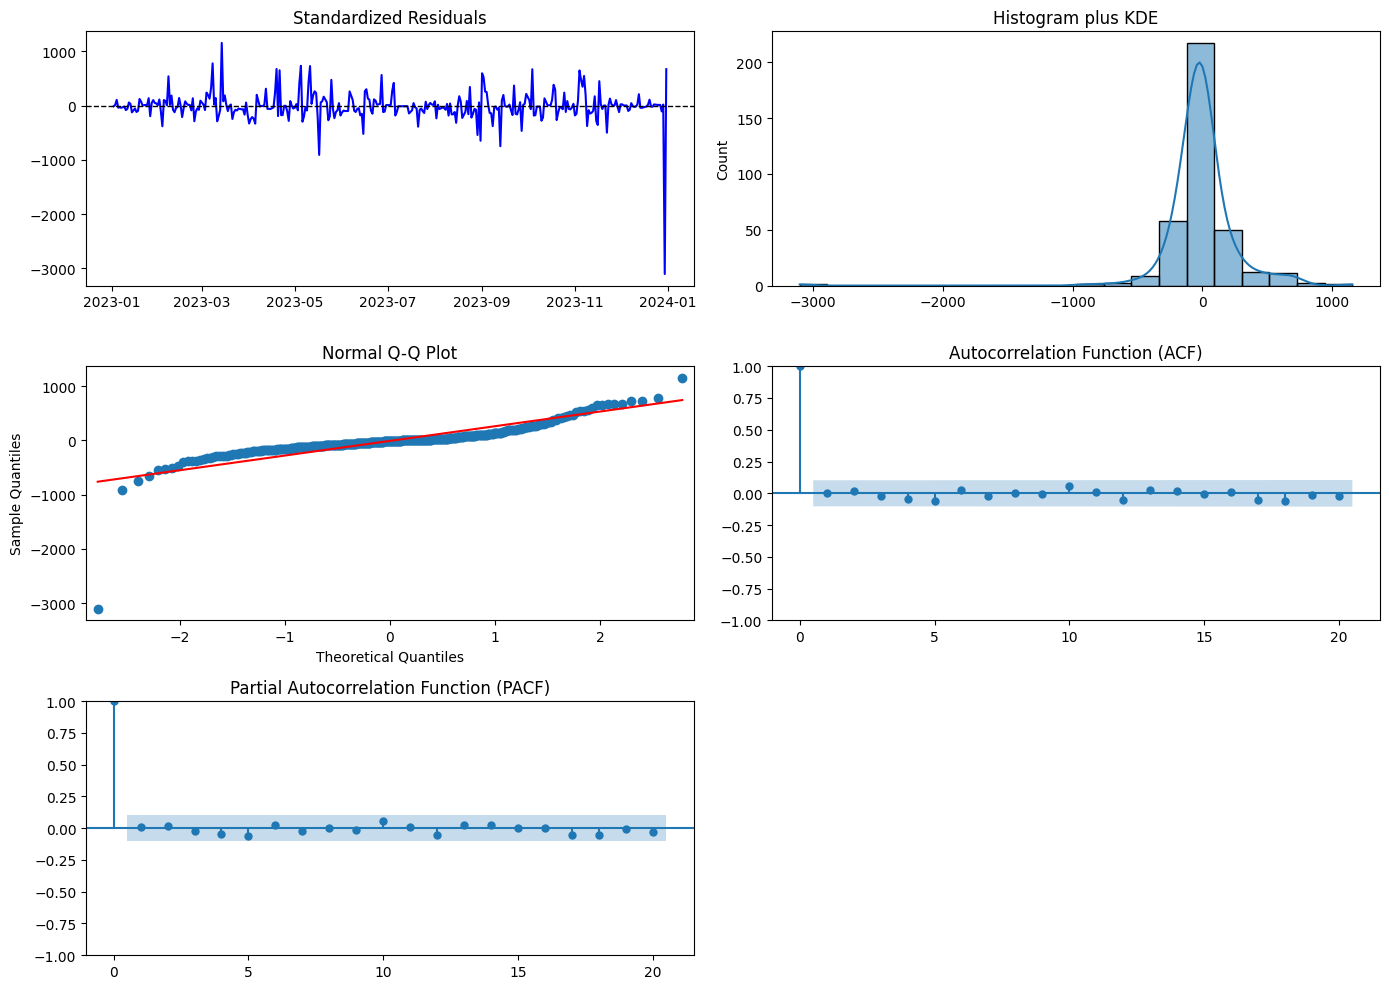

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Buat figure dengan 5 subplot
fig, ax = plt.subplots(3, 2, figsize=(14, 10))

# 1. Standardized Residual
ax[0, 0].plot(model_fit.resid, color='blue')
ax[0, 0].axhline(y=0, linestyle='--', color='black', linewidth=1)
ax[0, 0].set_title("Standardized Residuals")

# 2. Histogram & KDE
sns.histplot(model_fit.resid, kde=True, bins=20, ax=ax[0, 1])
ax[0, 1].set_title("Histogram plus KDE")

# 3. Normal Q-Q Plot
sm.qqplot(model_fit.resid, line='s', ax=ax[1, 0])
ax[1, 0].set_title("Normal Q-Q Plot")

# 4. ACF Plot
plot_acf(model_fit.resid, ax=ax[1, 1], lags=20)
ax[1, 1].set_title("Autocorrelation Function (ACF)")

# 5. PACF Plot
plot_pacf(model_fit.resid, ax=ax[2, 0], lags=20)
ax[2, 0].set_title("Partial Autocorrelation Function (PACF)")

# Hapus subplot kosong (jika ada)
fig.delaxes(ax[2, 1])

plt.tight_layout()
plt.show()